In [1]:
from fbm import FBM
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
def calc_msd_correct(right, left):
    return (right - left) ** 2

## Init parameters

In [3]:
#iterations = 100

size = 100                             # lenght of sequence
size1 = 1000                             # how much particles we have

myarray = np.zeros((size1, size))      # coeff 0.5 fbm   
myarray2 = np.zeros((size1, size))     # coeff 0.9 fbm
myarray3 = np.zeros((size1, size))

myWmsd = np.zeros((size1, size - 1))
myWmsd2 = np.zeros((size1, size - 1))
myWmsd3 = np.zeros((size1, size - 1))


f = FBM(size-1, 0.85) # superdiffusion
f2 = FBM(size-1, 0.5) # diffusion
f3 = FBM(size-1, 0.25)# subdiffusion

### Generating fbm

In [4]:
for i in range(myarray.shape[0]):
    myarray[i] = f.fbm()
    myarray2[i] = f2.fbm()
    myarray3[i] = f3.fbm()

### Preproccesing to save dataset

In [5]:
myarray.shape

(1000, 100)

In [6]:
ar = np.ones(size1).reshape(-1, 1)
br = np.zeros(size1).reshape(-1, 1)
cr = np.ones(size1).reshape(-1, 1) * 2
myarray[:, -1:] = ar
myarray2[:, -1:] = br
myarray3[:, -1:] = cr

### Save to file

In [7]:
np.savetxt('dataset_fbm_target_supdiff.csv', myarray, delimiter=',')
np.savetxt('dataset_fbm_target_diff.csv', myarray2, delimiter=',')
np.savetxt('dataset_fbm_target_subdiff.csv', myarray3, delimiter=',')

## Graphics of different fbm simulations

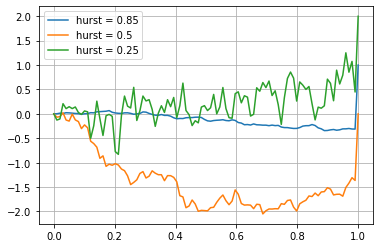

In [7]:
plt.figure()
for i in range(1):
    plt.plot(np.linspace(0, 1, size), myarray[i], label = 'hurst = 0.85')
    plt.plot(np.linspace(0, 1, size), myarray2[i], label = 'hurst = 0.5')
    plt.plot(np.linspace(0, 1, size), myarray3[i], label = 'hurst = 0.25')
    
    #plt.plot(np.linspace(0, 1, size), myarray3[i])
plt.grid()
plt.legend()
plt.show()

### Calculating MSD

In [8]:
for i in range(myWmsd.shape[0]):
    for j in range(myWmsd.shape[1]):
        myWmsd[i][j] = calc_msd_correct(myarray[i][j], myarray[i][0])
        myWmsd2[i][j] = calc_msd_correct(myarray2[i][j], myarray2[i][0])
        myWmsd3[i][j] = calc_msd_correct(myarray3[i][j], myarray3[i][0])

## MSD graphics for different hurst coeff

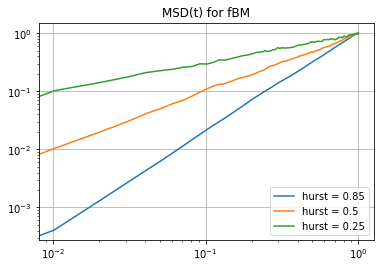

In [9]:
itog = np.mean(myWmsd, axis=0)
itog2 = np.mean(myWmsd2, axis=0)
itog3 = np.mean(myWmsd3, axis=0)
plt.figure()
plt.plot(np.linspace(0, 1, size-1), itog, label="hurst = 0.85")
plt.plot(np.linspace(0, 1, size-1), itog2, label="hurst = 0.5")
plt.plot(np.linspace(0, 1, size-1), itog3, label="hurst = 0.25")
plt.legend()
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('MSD(t) for fBM')
plt.show()